(0.20656252125392963, 0.0)
(0.5816234806972731, 0.0)
(0.4886521467746083, 0.0)
(0.19297913850223813, 0.0)
(0.8355495607857073, 0.0)
(-0.8350200494081671, 0.0)
(0.7578872054740988, 0.0)
(0.8951271114391517, 0.0)
(0.8814136857155997, 0.0)
Optimization terminated successfully.
         Current function value: 0.057893
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               blueWins   No. Observations:               199925
Model:                          Logit   Df Residuals:                   199918
Method:                           MLE   Df Model:                            6
Date:                Thu, 11 Jun 2020   Pseudo R-squ.:                  0.9165
Time:                        13:43:49   Log-Likelihood:                -11574.
converged:                       True   LL-Null:                   -1.3857e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    st

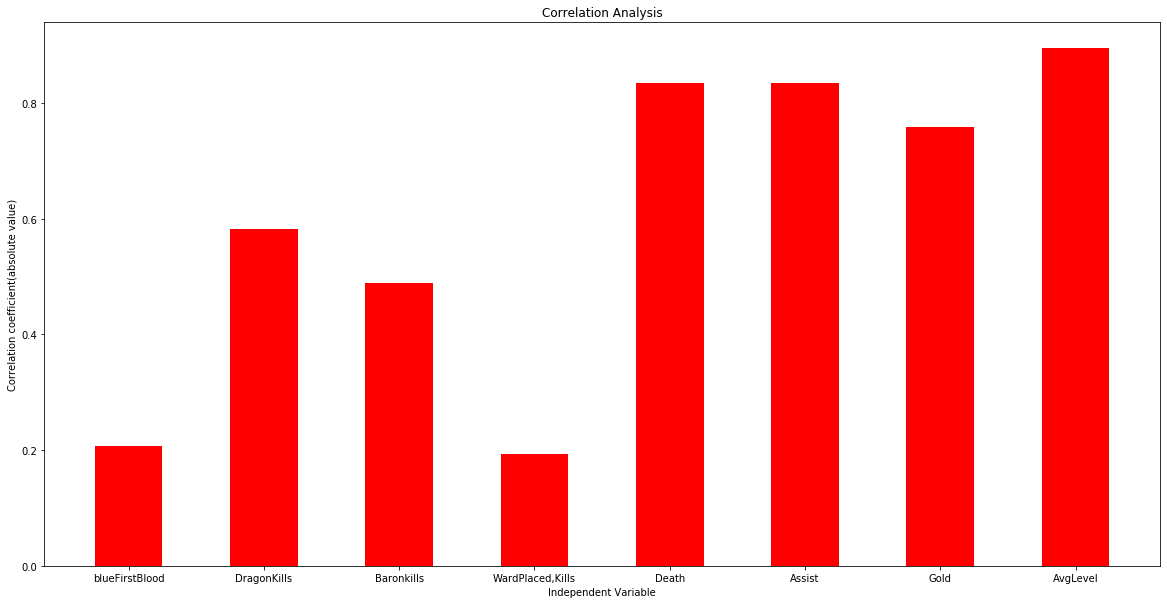

In [1]:
import pandas as pd

UsingData_df = pd.DataFrame(pd.read_excel("FinalData.xlsx"))
UsingData_df.columns = ["number","blueWins","blueFirstBlood","DragonKills","Baronkills","WardPlaced","Kills","Death","Assist","Gold","AvgLevel"]
UsingData_df.drop("number",axis=1,inplace=True)  #불필요한 열 제거

import scipy.stats as stats
#각각의 독립변수와 종속변인간의 상관계수 분석

blueFirstBlood_analysis = stats.pearsonr(UsingData_df.blueWins,UsingData_df.blueFirstBlood)
print(blueFirstBlood_analysis)

DragonKills_analysis = stats.pearsonr(UsingData_df.blueWins,UsingData_df.DragonKills)
print(DragonKills_analysis)

Baronkills_analysis = stats.pearsonr(UsingData_df.blueWins,UsingData_df.Baronkills)
print(Baronkills_analysis)

WardPlaced_analysis = stats.pearsonr(UsingData_df.blueWins,UsingData_df.WardPlaced)
print(WardPlaced_analysis)

Kills_analysis = stats.pearsonr(UsingData_df.blueWins,UsingData_df.Kills)
print(Kills_analysis)

Death_analysis = stats.pearsonr(UsingData_df.blueWins,UsingData_df.Death)
print(Death_analysis)

Assist_analysis = stats.pearsonr(UsingData_df.blueWins,UsingData_df.Assist)
print(Assist_analysis)

Gold_analysis = stats.pearsonr(UsingData_df.blueWins,UsingData_df.Gold)
print(Gold_analysis)

AvgLevel_analysis = stats.pearsonr(UsingData_df.blueWins,UsingData_df.AvgLevel)
print(AvgLevel_analysis)

#상관분석 시각화(Death값은 작을수록 상관관계가 높다고 해석하여, 얼마나 유의미한 관계인지를 보기위해 절댓값으로 계산하였습니다.)
import numpy as np
import matplotlib.pyplot as plt

IndependentVariable_Name=['blueFirstBlood','DragonKills','Baronkills','WardPlaced,Kills','Death','Assist','Gold','AvgLevel']
result_value=[0.20656252125392963,0.5816234806972731,0.4886521467746083,0.19297913850223813,0.8355495607857073,0.8350200494081671,0.7578872054740988,0.8951271114391517]
plt.figure(figsize=(20,10))
plt.bar(IndependentVariable_Name,result_value, width = 0.5, color = 'red')
plt.title("Correlation Analysis")
plt.xlabel("Independent Variable")
plt.ylabel("Correlation coefficient(absolute value)")
plt.show

#로지스틱 회귀분석
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

studymodel_df = sm.Logit.from_formula("blueWins ~ DragonKills + Kills + Death + Assist + Gold + AvgLevel ", UsingData_df)
resultmodel_df = studymodel_df.fit()
print(resultmodel_df.summary())